# Introduction

Linear regression is an important supervised machine learning algorithm which tries to model the relationship between a continous target variable and one or more independent variable by fitting a linear equation to the data.

For a linear regression to be a good choice, there needs to be a relationship between independent variable(s) and target variable. We can explore the relationship among these variables by utilizing scatter plots and correlation matrix. 

Linear regression model tries to fit a regression line to the data points that best represents the relations or correlations. The most common algorithm is the ordinary least squares(OLS), which is found by minimizing the sum of squares of the distance between data points and the regression line. 

The method used here is the mean squared error(MSE) which measures the average squared differences between the estimated and actual value. 

Gradient Descent algorithm which uses the first order derivative (slope of the line) and takes repeated steps towards the opposite direction of the gradient of the function because that would lead to the steepest point. Example) if it's a positive slope, it will take steps towards left to find the most optimal point, in other words local minima. Since this is a linear regression problem, we will have a bowl shape figure which results to global minimum. The goal is to take steps down the cost function in the direction with the steepest descent. The size of each step is determined by the paramter alpha, known as the learning rate. Smaller alpha would lead to smaller steps and longer training time whereas larger alpha would lead to larger steps but possible divergence rather than convergence. Once we have reached the local or global minima, the slope of the cost function would be zero or very close to it. 

The updating parameter is theta - learning rate * Derivative of the cost function with respect to theta. 

$θ_{1}:=θ_{1} −α  \frac{d}{dθ_{1}} J(θ_{1})$

Even with a fixed learning rate, as we approach a global minimum, gradient descent will automatically take smaller steps since the slope of the line is decreasing. Thus, no need to decrease alpha over time because it will eventually converge. 



In [1]:
# Importing the necessary libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Imagine we want to invest in real estate properties so we want to predict the price. Over the years, we have noticed that there is a linear relationship between the market price of the house and the area. Also a similar relationship between the market price and the distance to the city center. Ignore the units for this example.

# Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

We can write the relationship with a 2-variable linear equation:

This equation shows that the price (y) can be calculated by the area (x1) times the weight parameter (w1, higher weight indicates higher importance) and the distance (x2) times its weight paramenter (w2).

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [2]:
def generate_examples(num=1000):
    # W is a 2-D vector similar to our example
    W = [1.0, -3.0]
    # b is a scalar value
    b = 1.0
    
    # we need to reshape it so the inner variable in the dot product match. Ex) (800,2)(2,1)
    W = np.reshape(W, (2, 1))
    
    # 2 because we have x1 and x2
    X = np.random.randn(num, 2)
    
    # adding noise to the data so it can better represent the real world data
    y = b + np.dot(X, W) + np.random.randn()
    
    y = np.reshape(y, (num, 1))
    
    return X, y

In [3]:
X, y = generate_examples()

In [4]:
# 1000 examples, 2 independent features(Area and Distance)
# 1000 examples, 1 dependent variable(Price)
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [5]:
# Observing the first elements
print('X=', X[0], ' & y=', y[0])

X= [ 0.61623325 -0.04923818]  & y= [1.51933862]


# Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value (J).

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [6]:
class Model:
    # num_features is the number of independent variables = 2
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [7]:
# let's create a model with 2 fetures
model = Model(2)
print('W=', model.W)
print('b=', model.b)

W= [[-0.06573209]
 [-0.74046552]]
b= 0.9268083709137289


# Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions $\hat{y}$ for X with current values of W and b.
2. Compute the loss (J) between y and $\hat{y}$
3. Find gradients of the loss function with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [8]:
class Model(Model):
    # X is the set of input features that we have
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [9]:
preds = Model(2).forward_pass(np.random.randn(4, 2))
print(preds.shape)

(4, 1)


# Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [10]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        loss = np.sum(np.square(y_hat - y_true))
        return loss/(2*y_hat.shape[0]) #y_hat.shape[0] captures the number of examples (m)

In [11]:
model = Model(2)

preds = model.forward_pass(X)
loss = model.compute_loss(y, preds)

In [12]:
loss

4.859916707460463

# Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [13]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        # db is the loss gradient with respect to the bias
        db = (1/m)* np.sum(y_hat - y_true)
        
        # dW is the loss gradient with respect to the weight parameter (W)
        dW = (1/m)* np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
        return dW, db

In [14]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [15]:
print(dW.shape, db.shape)

(2,) ()


# Update Parameters

Sometimes the dW variables may be too large. We implement a small varialbe known as the learning rate to multiply it by the dW in order to help the function to converge more efficiently rather than diverging. 

The choice of correct learning rate is very important as it ensures that Gradient Descent converges in a reasonable time. Too small, it will take a long time to find the local minima. Too large, it may overshoot the minima and diverge. 

In [16]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

# Training Loop

In [17]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            # for every 100 iterations, print the loss in 4 decimal places.
            if i % 100 == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [18]:
model = Model(2)

In [19]:
X_train, y_train = generate_examples()

In [20]:
losses = model.train(X_train, y_train, 1000, 3e-3)

Iter: 0, Current loss: 12.0851
Iter: 100, Current loss: 6.7817
Iter: 200, Current loss: 3.8108
Iter: 300, Current loss: 2.1442
Iter: 400, Current loss: 1.2080
Iter: 500, Current loss: 0.6814
Iter: 600, Current loss: 0.3848
Iter: 700, Current loss: 0.2175
Iter: 800, Current loss: 0.1231
Iter: 900, Current loss: 0.0698


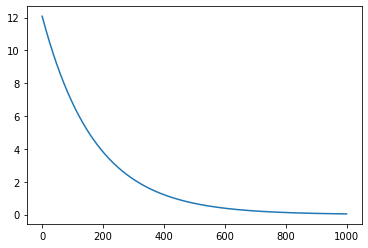

In [21]:
plt.plot(range(1000), losses);

# Predictions

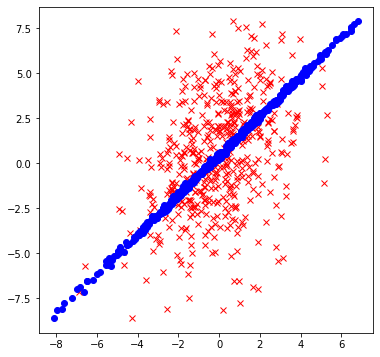

In [31]:
model_untrained = Model(2)

X_test, y_test = generate_examples(500)
y_test = np.reshape(y_test, (y_test.shape[0], 1))

preds_untrained = model_untrained.forward_pass(X_test)
preds_trained = model.forward_pass(X_test)

plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx')
plt.plot(preds_trained, y_test, 'bo')
plt.show()

In [32]:
model.W

array([[ 0.82302179],
       [-2.77062853]])

In [33]:
model.b

0.14212455303591554